## Library import

In [1]:
# --------------------------------------------Import library--------------------------------------------------------------------------
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager

### Functions

In [2]:
def d2K(Temperature_degree):
    Temperature_degree = Temperature_degree + 273.15
    return Temperature_degree
def K2d(Temperature_degree):
    Temperature_degree = Temperature_degree - 273.15
    return Temperature_degree
def cut2(Value):
    Value = round(Value,2)
    return Value
def m2cm(val):
    val = val*100
    return val
def cm2m(val):
    val = val/100
    return val
def set_material(Length, Heat_conductivity, Specific_heat, Density, Divide_num):
    
    global length, k, c, rho, C, div, N, del_x, R, K

    # 전체 벽 두께
    length = Length # [m]

    # 열전도율 [W/(m*K)]
    k = Heat_conductivity

    # 비열 [J/(Kg*K)]
    c = Specific_heat

    # 밀도 [kg/m3]
    rho = Density 

    # 체적 열용량 [J/(m3*K)]
    C = c*rho

    # 차분할 수
    div = Divide_num 

    N = div

    # 차분된 블록의 체적 = 차분된 블록의 길이 # [m3]
    del_x = (length/div)*1*1 # [m3]

    # 열저항 [(m2*K)/W]
    R = del_x/k

    # 열관류율 [W/(m2*K)]
    K = 1/R
def set_time_val(time_step, Duration): 
    global t, duration, time_step_list, time_step_list_num, SEC_IN_HOUR
    
    SEC_IN_HOUR = 3600
    # 한 타임스탭 간격
    t = time_step # [s] 

    # 총 Simulation 기간 (Pre simulation 120 [h])
    duration = Duration # [h]

    # 타임스탭 리스트 [20, 40, ...] [s]
    time_step_list = list(range(t, duration*SEC_IN_HOUR+t, t))

    # 타임스탭 리스트 요소 개수 
    time_step_list_num = int((duration*SEC_IN_HOUR)/t)
def Sum_node(list_name):
    node_1 = [list_name[i][0] for i in range(len(list_name))]
    node_2 = [list_name[i][1] for i in range(len(list_name))]
    node_3 = [list_name[i][2] for i in range(len(list_name))]
    node_4 = [list_name[i][3] for i in range(len(list_name))]
    node_5 = [list_name[i][4] for i in range(len(list_name))]

    Sum_node = []
    for tidx in range(time_step_list_num):
        Sum_node.append(node_1[tidx] + 
                        node_2[tidx] + 
                        node_3[tidx] + 
                        node_4[tidx] + 
                        node_5[tidx])
    return Sum_node
def Intergrate(VAL_WANT_TO_INT,timestep,a,b):
    SEC_IN_HOUR = 3600
    VAL_Intergrated = 0
    for i in range(int(a*SEC_IN_HOUR/timestep),b*int(SEC_IN_HOUR/timestep)):
        VAL_Intergrated = VAL_Intergrated + VAL_WANT_TO_INT[i]*timestep
    return VAL_Intergrated
def cm2in(value):
    return value/2.54
def J2KJ(value):
    return value/1000
def J2MJ(value):
    return value/1000000

### Plot control

In [3]:
PLT_RC_PARAMS = {
    "font": {
        "size": 9,
        "family": "Dejavu sans",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        # "dashed_pattern": [0.7, 9],
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "handletextpad": 0.4,
        "numpoints": 3,
        "borderaxespad": 0.4,
        "handletextpad": 0.3,
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 3.0,
        },
        "minor": {
            "width": 0.25,
            "size": 2.0,
        }
    },
    # Other parameters...
}

In [4]:
# 폰트 크기 변수 
FS_xlabel = 10
FS_ylabel = 10
Axis_FS = 8
LEG_FS = 6.5
FS_Annotation = 8.5

pad_val = 5 # -- 축 숫자와 그래프 축의 간격

# figsize
figsize_x = 10
figsize_y = 7

# handle length
handle_length = 4.5

# width of tick
width_major = 0.4
width_minor = 0.2

# Line width
LW = np.arange(0, 3.0, 0.25)

### Material

In [5]:
MATERIAL_1 = {
'Length' : 0.2,
'Heat_conductivity' : 0.5,
'Specific_heat' : 1000,
'Density' : 2000,
'Divide_num' : 5,
}
MATERIAL_2 = {
'Length' : 0.2,
'Heat_conductivity' : 1.0,
'Specific_heat' : 1000,
'Density' : 2000,
'Divide_num' : 5,
}
MATERIAL_3 = {
'Length' : 0.2,
'Heat_conductivity' : 1.5,
'Specific_heat' : 1000,
'Density' : 2000,
'Divide_num' : 5,
}
MATERIAL_4 = {
'Length' : 0.2,
'Heat_conductivity' : 2.0,
'Specific_heat' : 1000,
'Density' : 2000,
'Divide_num' : 5,
}
MATERIAL = [MATERIAL_1,MATERIAL_2,MATERIAL_3,MATERIAL_4]

In [6]:
# Empty list
ENT_IF_ST = [[] for i in range(len(MATERIAL))]
ENT_G_ST = [[] for i in range(len(MATERIAL))]
ENT_OF_ST = [[] for i in range(len(MATERIAL))]
EX_IF_ST = [[] for i in range(len(MATERIAL))]
EX_C_ST = [[] for i in range(len(MATERIAL))]
EX_OF_ST = [[] for i in range(len(MATERIAL))]

EX_C_UST =  [[] for i in range(len(MATERIAL))]
EX_ST_UST = [[] for i in range(len(MATERIAL))]
EX_OF_UST = [[] for i in range(len(MATERIAL))]
EX_IF_UST = [[] for i in range(len(MATERIAL))]

### Colors

In [7]:
C1 = '#000000'
C2 = '#320000'
C3 = '#640000'
C4 = '#af0000'
C5 = '#ff002b'
C6 = '#d10a0a'
C7 = '#e8481c'
C8 = '#f5852a'
C9 = '#f5b73b'
C10 ='#ffe100'

In [8]:
pd.DataFrame(EX_ST_UST[1])

""


## Get data

In [9]:
for midx in range(len(MATERIAL)):

    set_material(**MATERIAL[midx])
    set_time_val(20, 180)

    Case = 2
    # Case 1 (Constant condition)
    if Case == 1:
        T_BC1 = []
        T_BC2 = []
        for tidx in time_step_list:
            T_BC1.append(d2K(30)) # [K]
            T_BC2.append(d2K(10))
        T_init = d2K(10)
        T_env = [d2K(10) for i in range(time_step_list_num)]
    # Case 2 (Oscillate condition)
    elif Case == 2:
        T_BC1 = []
        T_BC2 = []
        for tidx in time_step_list:
            T_BC1.append(d2K(20 + 10*(math.sin(2*math.pi*tidx/(3600*24))))) # [K]
            T_BC2.append(d2K(20))
        T_init = d2K(20)
        T_env = T_BC1

    T = []
    T_left = []
    T_right = []

    for tidx in range(time_step_list_num):
        T.append([T_init for i in range(N)])
        T_left.append([T_init for i in range(N)])
        T_right.append([T_init for i in range(N)])

    # -------------------------------------------Tridiagonal matrix------------------------------------------------------------------------
    a_list = [-t*K for i in range(N)]
    a_list[0] = -2*t*K

    b_list = [2*del_x*C + t*K + t*K for i in range(N)]
    b_list[0] = 2*del_x*C + t*(2*K) + t*K
    b_list[N-1] = 2*del_x*C + t*K + t*(2*K)

    c_list = [-t*K for i in range(N)]
    c_list[N-1] = -t*(2*K)

    #                        [cm]
    # external |--1-----3-----5-----7-----9--| internal space
    #          |  +  |  +  |  +  |  +  |  +  |
    #   (T_BC1)|  0     1     2     3     4  |(T_BC2) 
    #                     [node num]         

    ## Tridiagonal matrix algorithm

    #          | b1 c1  0  0  0 |   | T[n+1][1] |      | g1 |    
    #          | a2 b2 c2  0  0 |   | T[n+1][2] |      | g2 |               
    #          |  0 a3 b3 c3  0 | . | T[n+1][3] |   =  | g3 |      
    #          |  0  0 a4 b4 c4 |   | T[n+1][4] |      | g4 |
    #          |  0  0  0 a5 b5 |   | T[n+1][5] |      | g5 |
    #
    #                  A          *       T         =    B

    # N x N 단위행렬 생성
    A = np.identity(N)

    for idx in range(N-1): 
        A[idx+1][idx] = a_list[idx+1]
        A[idx][idx] = b_list[idx]
        A[N-1][N-1] = b_list[N-1]
        A[idx][idx+1] = c_list[idx]

    A_inv = np.linalg.inv(A)
                                
    for tidx in range(time_step_list_num-1):

        B = []
        for nidx in range(1,N-1):
            B.append([t*K*T[tidx][nidx-1]+(2*del_x*C - t*K - t*K)*T[tidx][nidx] + t*K*T[tidx][nidx+1]])
        # 포문 밖에서 마지막으로 앞뒤에 추가
        B.insert(0,[2*t*(2*K)*T_BC1[tidx]+(2*del_x*C - t*(2*K) - t*K)*T[tidx][0] + t*K*T[tidx][1]])
        B.append([t*K*T[tidx][N-2]+(2*del_x*C - t*K - t*(2*K))*T[tidx][N-1] + 2*t*(2*K)*T_BC2[tidx]])
        
        for nidx in range(N): 
            T[tidx+1][nidx] = np.dot(A_inv, B)[nidx][0]

    for tidx in range(time_step_list_num):
        for nidx in range(1,N-1): 

            # 셀 왼쪽 경계 온도 정의 nidx
            T_left[tidx][0] = T_BC1[tidx]
            T_left[tidx][nidx] = (T[tidx][nidx] + T[tidx][nidx-1])/2
            T_left[tidx][N-1] = (T[tidx][N-1] + T[tidx][N-2])/2

            # 셀 오른쪽 경계 온도 정의 0
            T_right[tidx][0] = (T[tidx][1] + T[tidx][0])/2                                              
            T_right[tidx][nidx] = (T[tidx][nidx+1] + T[tidx][nidx])/2 
            T_right[tidx][N-1] = T_BC2[tidx]

    T_half = []
    T_left_half = []
    T_right_half = []

    for tidx in range(time_step_list_num):
        T_half.append([T_init for i in range(N)]) 
        T_left_half.append([T_init for i in range(N)])
        T_right_half.append([T_init for i in range(N)])

    for tidx in range(time_step_list_num-1):
        for nidx in range(1,N-1):
            # T
            T_half[tidx][0] = (T[tidx+1][0] + T[tidx][0])/2
            T_half[tidx][nidx] = (T[tidx+1][nidx] + T[tidx][nidx])/2
            T_half[tidx][N-1] = (T[tidx+1][N-1] + T[tidx][N-1])/2
            # T_left
            T_left_half[tidx][0] = (T_left[tidx+1][0] + T_left[tidx][0])/2
            T_left_half[tidx][nidx] = (T_left[tidx+1][nidx] + T_left[tidx][nidx])/2
            T_left_half[tidx][N-1] = (T_left[tidx+1][N-1] + T_left[tidx][N-1])/2
            # T_right    
            T_right_half[tidx][0] = (T_right[tidx+1][0] + T_right[tidx][0])/2
            T_right_half[tidx][nidx] = (T_right[tidx+1][nidx] + T_right[tidx][nidx])/2
            T_right_half[tidx][N-1] = (T_right[tidx+1][N-1] + T_right[tidx][N-1])/2

    # -------------------------------------------Heat flux------------------------------------------------------------------------

    # external |<-------------------------------->| internal space
    #          +    +    +    +    +    +    +    +
    #         T_BC  0    1    2    3    4    5   T_is
    #                --q_in->[2]--q_out-> 
    #                       --q-> 
    #                  q = [(q_in + q_out)/2]


    q_init = 0

    q = []
    q_in = []
    q_out = []

    
    for tidx in range(time_step_list_num):
        q.append([q_init for i in range(N)])  
        q_in.append([q_init for i in range(N)])
        q_out.append([q_init for i in range(N)])

    for tidx in range(time_step_list_num): 
        for nidx in range(1,N-1): 
            q_in[tidx][0] =  (-1)*(2*K)*(T[tidx][0] - T_BC1[tidx])
            q_in[tidx][nidx] = (-1)*K*(T[tidx][nidx] - T[tidx][nidx-1])
            q_in[tidx][N-1] = (-1)*K*(T[tidx][N-1] - T[tidx][N-2])

            q_out[tidx][0] = (-1)*K*(T[tidx][1] - T[tidx][0])
            q_out[tidx][nidx] = (-1)*K*(T[tidx][nidx+1] - T[tidx][nidx])
            q_out[tidx][N-1] = (-1)*(2*K)*(T_BC2[tidx] - T[tidx][N-1])

            q[tidx][0] = (q_in[tidx][0] + q_out[tidx][0])/2
            q[tidx][nidx] = (q_in[tidx][nidx] + q_out[tidx][nidx])/2
            q[tidx][N-1] = (q_in[tidx][N-1] + q_out[tidx][N-1])/2

    q_half = []
    q_in_half = []
    q_out_half = []

    # [timestep][node]로 구성된 이중리스트 만들기 임시 
    for tidx in range(time_step_list_num):
        q_half.append([q_init for i in range(N)]) 
        q_in_half.append([q_init for i in range(N)])    
        q_out_half.append([q_init for i in range(N)])
    for tidx in range(time_step_list_num-1): # 리스트에서 tidx + 1 을 사용하기 위함
        for nidx in range(1,N-1):
            # Heat flux
            q_half[tidx][0] = (q[tidx+1][0] + q[tidx][0])/2
            q_half[tidx][nidx] = (q[tidx+1][nidx] + q[tidx][nidx])/2
            q_half[tidx][N-1] = (q[tidx+1][N-1] + q[tidx][N-1])/2
            # Heat flux in
            q_in_half[tidx][0] = (q_in[tidx+1][0] + q_in[tidx][0])/2
            q_in_half[tidx][nidx] = (q_in[tidx+1][nidx] + q_in[tidx][nidx])/2
            q_in_half[tidx][N-1] = (q_in[tidx+1][N-1] + q_in[tidx][N-1])/2
            # Heat flux out
            q_out_half[tidx][0] = (q_out[tidx+1][0] + q_out[tidx][0])/2
            q_out_half[tidx][nidx] = (q_out[tidx+1][nidx] + q_out[tidx][nidx])/2
            q_out_half[tidx][N-1] = (q_out[tidx+1][N-1] + q_out[tidx][N-1])/2

    # -------------------------------------------Entropy------------------------------------------------------------------------

    ## entropy equation 
    #
    #  [Entropy inflow] + [Entropy generation rate] = [Entropy stored rate] + [Entropy outflow] 
    #

    entropy = 0 # [W/(m^2*K)]

    ENT_IF_UST = []
    ENT_G_UST = []
    ENT_ST_UST = []
    ENT_OF_UST = []

    # [timestep][node]로 구성된 이중리스트 만들기 임시 
    for tidx in range(time_step_list_num):
        ENT_IF_UST.append([entropy for i in range(N)]) 
        ENT_G_UST.append([entropy for i in range(N)])
        ENT_ST_UST.append([entropy for i in range(N)])
        ENT_OF_UST.append([entropy for i in range(N)])

    for tidx in range(time_step_list_num-1):
        for nidx in range(N):
            # Entropy in 
            ENT_IF_UST[tidx][nidx] = q_in_half[tidx][nidx]/T_left_half[tidx][nidx]
            # Entropy generated
            ENT_G_UST[tidx][nidx] = (del_x/k)*(q_half[tidx][nidx]/T_half[tidx][nidx])*(q_half[tidx][nidx]/T_half[tidx][nidx])
            # Entropy stored
            ENT_ST_UST[tidx][nidx] = del_x*C*(T[tidx+1][nidx]-T[tidx][nidx])/(t*T_half[tidx][nidx])
            # Entropy out
            ENT_OF_UST[tidx][nidx] = q_out_half[tidx][nidx]/T_right_half[tidx][nidx]

    # -------------------------------------------Exergy------------------------------------------------------------------------

    exergy = 0 # [W/(m^2*K)]


    for tidx in range(time_step_list_num):
        EX_IF_UST[midx].append([exergy for i in range(N)]) 
        EX_C_UST[midx].append([exergy for i in range(N)])
        EX_ST_UST[midx].append([exergy for i in range(N)])
        EX_OF_UST[midx].append([exergy for i in range(N)])

    for tidx in range(time_step_list_num-1): 
        for nidx in range(N):
            # Exergy in 
            EX_IF_UST[midx][tidx][nidx] = q_in_half[tidx][nidx]*(1-(T_env[tidx])/(T_left_half[tidx][nidx]))
            # Exergy consumed
            EX_C_UST[midx][tidx][nidx] = (del_x/k)*(T_env[tidx]*(q_half[tidx][nidx]/T_half[tidx][nidx])**2)
            # Exergy stored
            EX_ST_UST[midx][tidx][nidx] = del_x*C*(1-T_env[tidx]/T_half[tidx][nidx])*(T[tidx+1][nidx]-T[tidx][nidx])/t
            # Exergy out
            EX_OF_UST[midx][tidx][nidx] = q_out_half[tidx][nidx]*(1-(T_env[tidx])/(T_right_half[tidx][nidx]))

    # -------------------------------------------Kelvin to degree------------------------------------------------------------------------
    for tidx in range(len(time_step_list)):
        for nidx in range(N):
            T[tidx][nidx] = K2d(T[tidx][nidx])

    for tidx in range(time_step_list_num):
        T_BC1[tidx] = K2d(T_BC1[tidx])
        T_BC2[tidx] = K2d(T_BC2[tidx])

    time = [t*i/3600 for i in range(time_step_list_num)]
    # -----------------------------------------------------------Steady---------------------------------------------------------------------------
    # ------------------------------------------------------------state------------------------------------------------------------------------
    for tidx in range(time_step_list_num):
        T_BC1[tidx] = d2K(T_BC1[tidx])
        T_BC2[tidx] = d2K(T_BC2[tidx])
    # --------------------------------------------------------------------------------------------------------------------------------------
    K_tot = K/N
    q_1 = []
    q_2 = []
    for tidx in range(time_step_list_num):
        q_1.append(K_tot*(T_BC1[tidx] - T_BC2[tidx]))
        q_2.append(K_tot*(T_BC1[tidx] - T_BC2[tidx]))
    # --------------------------------------------------------------------------------------------------------------------------------------
    for tidx in range(time_step_list_num):
        ENT_IF_ST[midx].append(q_1[tidx]/T_BC1[tidx])

    for tidx in range(time_step_list_num):
        ENT_G_ST[midx].append((K_tot*(T_BC1[tidx]-T_BC2[tidx])**2)/(T_BC1[tidx]*T_BC2[tidx]))

    for tidx in range(time_step_list_num):
        ENT_OF_ST[midx].append(q_2[tidx]/T_BC2[tidx])

    for tidx in range(time_step_list_num):
        EX_IF_ST[midx].append((1-(T_env[tidx]/T_BC1[tidx]))*q_1[tidx])

    for tidx in range(time_step_list_num):
        EX_C_ST[midx].append(((K_tot*(T_BC1[tidx]-T_BC2[tidx])**2)/(T_BC1[tidx]*T_BC2[tidx]))*T_env[tidx])

    for tidx in range(time_step_list_num):
        EX_OF_ST[midx].append((1-(T_env[tidx]/T_BC2[tidx]))*q_2[tidx])
    # --------------------------------------------------------------------------------------------------------------------------------------
    for tidx in range(time_step_list_num):
        T_BC1[tidx] = K2d(T_BC1[tidx])
        T_BC2[tidx] = K2d(T_BC2[tidx])


## plot funtion

In [58]:
def Temp():

    out_node = [T_BC1[i] for i in range(len(T_BC1))]
    node_1 = [T[i][0] for i in range(len(T))]
    node_2 = [T[i][1] for i in range(len(T))]
    node_3 = [T[i][2] for i in range(len(T))]
    node_4 = [T[i][3] for i in range(len(T))]
    node_5 = [T[i][4] for i in range(len(T))]
    in_node = [T_BC2[i] for i in range(len(T_BC2))]

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = ["Elapsed time [h]"]*nfigs
    ylabel = ['Temperature [$^{\circ}$C]']

    # 그래프의 색 및 라벨 설정  
    color_list = [
                '#180f0d',
                '#320000',
                '#7a1514',       
                '#ac2a1a', 
                '#c46d1c', 
                '#FDB827',
                '#ffe100',
                ]
                
    label_list = [
                'BC1',
                f'x = {math.ceil(m2cm(del_x/2))} cm', 
                f'x = {math.ceil(m2cm(del_x/2 + del_x*1))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*2))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*3))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*4))} cm',
                'BC2',
                ]

    line_list = ['-' for i in range(7)]
    line_list[0] = ':'
    line_list[6] = ':'

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )


    X = [time for i in range(7)]

    Y = [
        out_node,
        node_1,
        node_2,
        node_3,
        node_4,
        node_5,
        in_node,
        ]

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmin = [120]*nfigs
    xmax = [180]*nfigs
    xint = [12]*nfigs
    xmar = [0]*nfigs

    ymin = [0]*nfigs
    ymax = [30]*nfigs
    yint = [5]*nfigs
    ymar = [1]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols):
            for didx in range(7): 
                idx = ncols*ridx + cidx # ----------------------------------------------------- 인덱스 변수 

                ax[ridx,cidx].plot(
                X[didx],
                Y[didx],
                label = label_list[didx],
                c = color_list[didx],
                linestyle = line_list[didx],
                lw = LW[4],
                )

                # 라벨 설정
                ax[ridx,cidx].set_xlabel(f'{xlabel[ridx]}', fontsize=FS_xlabel)
                ax[ridx,cidx].set_ylabel(f'{ylabel[ridx]}', fontsize=FS_ylabel)
                
                # 축 눈금 및 라벨 크기 설정   
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
                
                # 축 위치 설정  
                ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
                ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
                
                # x,y 방향의 값 제한 
                ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
                ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
                ax[ridx,cidx].margins(x=0, y=0)
                
                # 보조 눈금의 수
                ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                
                # 그리드 설정
                ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);    
                
                # legend  
                handles, labels = ax[ridx,cidx].get_legend_handles_labels()
                legorder1 = range(len(handles))
                ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                        [labels[idx] for idx in legorder1], 
                                        loc='lower center', ncol=3,
                                        frameon=False,
                                        fontsize=LEG_FS, 
                                        columnspacing=3, labelspacing=1,
                                        handlelength= handle_length)
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=1)
def plot_Exergy_stored_rate_each_cell():

    nrows = 4
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = ['','','',"Elapsed time [h]"]
    ylabel = ['$\mathit{\chi_{c}} ~\mathrm{[W/m^2]}$']*nfigs

    # 그래프의 색 및 라벨 설정  
    color_list = [
                '#180f0d',
                '#7a1514',       
                '#ac2a1a', 
                '#c46d1c', 
                '#ffe100',
                ]
                
    label_list = [
                f'x = {math.ceil(m2cm(del_x/2))} cm', 
                f'x = {math.ceil(m2cm(del_x/2 + del_x*1))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*2))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*3))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*4))} cm',
                ]

    line_list = ['-' for i in range(5)]
    
    Annotation_list = [
        '(a) Material 1'r'$~ (\mathit{\alpha} =0.25\times 10^{-6}~\mathrm{m^2/s})$',
        '(b) Material 2'r'$~ (\mathit{\alpha} =0.50\times 10^{-6}~\mathrm{m^2/s})$',
        '(c) Material 3'r'$~ (\mathit{\alpha} =0.75\times 10^{-6}~\mathrm{m^2/s})$',
        '(d) Material 4'r'$~ (\mathit{\alpha} =1.00\times 10^{-6}~\mathrm{m^2/s})$',
                       ]

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)*nfigs), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )

    X = [time for i in range(5)]

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmax = [168]*nfigs
    xmin = [120]*nfigs
    xint = [12]*nfigs
    xmar = [0]*nfigs

    ymax = [0.6]*nfigs
    ymin = [-1.0]*nfigs
    yint = [0.2]*nfigs
    ymar = [0]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):  # -------------------------------------------------------------- 행 for 문 
        for cidx in range(ncols): # ----------------------------------------------------------- 열 for 문
            for nidx in range(5):  
                idx = ncols*ridx + cidx # ----------------------------------------------------- 인덱스 변수 

                ax[ridx,cidx].plot(
                X[nidx],
                pd.DataFrame(EX_ST_UST[ridx]).iloc[:,[nidx]],
                label = label_list[nidx],
                c = color_list[nidx],
                linestyle = line_list[nidx],
                lw = LW[4],
                )

                # 라벨 설정
                ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS_xlabel)
                ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS_ylabel)
                
                # 축 눈금 및 라벨 크기 설정   
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
                
                # 축 위치 설정  
                ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
                ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
                
                # x,y 방향의 값 제한 
                ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
                ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
                ax[ridx,cidx].margins(x=0, y=0)
                
                # 보조 눈금의 수
                ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 

                # Decimal
                ax[ridx,cidx].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
                
                # 그리드 설정
                ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);    
                
                # Annotaion
                ax[ridx,cidx].annotate(f'{Annotation_list[ridx]}', xy=(0, 1), xytext=(5, -5), va='top', xycoords='axes fraction', textcoords='offset points',
                                       fontsize=FS_Annotation)
                
                # legend  
                handles, labels = ax[ridx,cidx].get_legend_handles_labels()
                legorder1 = range(len(handles))
                ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                        [labels[idx] for idx in legorder1], 
                                        loc='upper right', ncol=1,
                                        frameon=False,
                                        fontsize=LEG_FS, 
                                        columnspacing=5, labelspacing=1,
                                        handlelength= handle_length)
        fig.align_labels()
        fig.tight_layout(pad=0.2, h_pad=1)
def plot_Exergy_consumption_rate_each_cell():

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = ['','','',"Elapsed time [h]"]
    ylabel = ['$\mathit{\chi_{c}} ~\mathrm{[W/m^2]}$']*nfigs

    # 그래프의 색 및 라벨 설정  
    color_list = [
                '#180f0d',
                '#7a1514',       
                '#ac2a1a', 
                '#c46d1c', 
                '#ffe100',
                ]
                
    label_list = [
                f'x = {math.ceil(m2cm(del_x/2))} cm', 
                f'x = {math.ceil(m2cm(del_x/2 + del_x*1))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*2))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*3))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*4))} cm',
                ]

    line_list = ['-' for i in range(5)]
    
    Annotation_list = [
        '(a) Material 1'r'$~ (\mathit{\alpha} =0.25\times 10^{-6}~\mathrm{m^2/s})$',
        '(b) Material 2'r'$~ (\mathit{\alpha} =0.50\times 10^{-6}~\mathrm{m^2/s})$',
        '(c) Material 3'r'$~ (\mathit{\alpha} =0.75\times 10^{-6}~\mathrm{m^2/s})$',
        '(d) Material 4'r'$~ (\mathit{\alpha} =1.00\times 10^{-6}~\mathrm{m^2/s})$',
                       ]

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)*nfigs), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 1200,
        )

    X = [time for i in range(5)]

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmax = [168]*nfigs
    xmin = [120]*nfigs
    xint = [12]*nfigs
    xmar = [0]*nfigs

    ymax = [2.5]*nfigs
    ymin = [0]*nfigs
    yint = [0.5]*nfigs
    ymar = [0]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):  # -------------------------------------------------------------- 행 for 문 
        for cidx in range(ncols): # ----------------------------------------------------------- 열 for 문
            for nidx in range(5):  
                idx = ncols*ridx + cidx # ----------------------------------------------------- 인덱스 변수 

                ax[ridx,cidx].plot(
                X[nidx],
                pd.DataFrame(EX_C_UST[ridx]).iloc[:,[nidx]],
                label = label_list[nidx],
                c = color_list[nidx],
                linestyle = line_list[nidx],
                lw = LW[4],
                )

                # 라벨 설정
                ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS_xlabel)
                ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS_ylabel)
                
                # 축 눈금 및 라벨 크기 설정   
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
                
                # 축 위치 설정  
                ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
                ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
                
                # x,y 방향의 값 제한 
                ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
                ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
                ax[ridx,cidx].margins(x=0, y=0)
                
                # 보조 눈금의 수
                ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 

                # Decimal
                ax[ridx,cidx].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
                
                # 그리드 설정
                ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);    
                
                # Annotaion
                ax[ridx,cidx].annotate(f'{Annotation_list[ridx]}', xy=(0, 1), xytext=(5, -5), va='top', xycoords='axes fraction', textcoords='offset points',
                                       fontsize=FS_Annotation)
                
                # legend  
                handles, labels = ax[ridx,cidx].get_legend_handles_labels()
                legorder1 = range(len(handles))
                ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                        [labels[idx] for idx in legorder1], 
                                        loc='upper right', ncol=1,
                                        frameon=False,
                                        fontsize=LEG_FS, 
                                        columnspacing=5, labelspacing=1,
                                        handlelength= handle_length)
        fig.align_labels()
        fig.tight_layout(pad=0.2, h_pad=1)
        save_dir='../fig/'
        # File name.
        save_stem = 'EX_C_rate_each_cell_plot'
        ext1 = '.svg'
        ext2 = '.png'
        #  bbox_inches = 'tight'
        plt.savefig(f'{save_dir}{save_stem}{ext1}', transparent = True, dpi=600, bbox_inches = 'tight')
        plt.savefig(f'{save_dir}{save_stem}{ext2}', transparent = True, dpi=600, bbox_inches = 'tight')
def Sum_plot(Val_name, X_label, Y_label, X_max, X_min, X_int, X_mar, Y_max, Y_min, Y_int, Y_mar):

    node_1 = [Val_name[i][0] for i in range(len(Val_name))]
    node_2 = [Val_name[i][1] for i in range(len(Val_name))]
    node_3 = [Val_name[i][2] for i in range(len(Val_name))]
    node_4 = [Val_name[i][3] for i in range(len(Val_name))]
    node_5 = [Val_name[i][4] for i in range(len(Val_name))]

    Sum_node = []
    for tidx in range(time_step_list_num):
        Sum_node.append(node_1[tidx] + 
                        node_2[tidx] + 
                        node_3[tidx] + 
                        node_4[tidx] + 
                        node_5[tidx]) 

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = [X_label]*nfigs
    ylabel = [Y_label]

    # 그래프의 색 및 라벨 설정  
    color_list = '#180f0d'

    line_list = '-'

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )


    X = time

    Y = Sum_node
        

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmax = [X_max]*nfigs
    xmin = [X_min]*nfigs
    xint = [X_int]*nfigs
    xmar = [X_mar]*nfigs

    ymax = [Y_max]*nfigs
    ymin = [Y_min]*nfigs
    yint = [Y_int]*nfigs
    ymar = [Y_mar]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):  # -------------------------------------------------------------- 행 for 문 
        for cidx in range(ncols): # ----------------------------------------------------------- 열 for 문
            idx = ncols*ridx + cidx # ----------------------------------------------------- 인덱스 변수 

            ax[ridx,cidx].plot(
            X,
            Y,
            c = color_list,
            linestyle = line_list,
            lw = LW[4],
            )

            # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[ridx]}', fontsize=FS_xlabel)
            ax[ridx,cidx].set_ylabel(f'{ylabel[ridx]}', fontsize=FS_ylabel)
            
            # 축 눈금 및 라벨 크기 설정   
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
            
            # 축 위치 설정  
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 방향의 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
            
            # 그리드 설정
            ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);    
            
            # legend  
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                    [labels[idx] for idx in legorder1], 
                                    loc='upper right', ncol=1,
                                    frameon=False,
                                    fontsize=LEG_FS, 
                                    columnspacing=5, labelspacing=1,
                                    handlelength= handle_length)
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=1)
def Steady_Temp():

    out_node = [T_BC1[i] for i in range(len(T_BC1))]
    node_1 = [T_BC1[tidx]-(T_BC1[tidx]-T_BC2[tidx])*((del_x/2)/(length)) for tidx in range(time_step_list_num)]
    node_2 = [T_BC1[tidx]-(T_BC1[tidx]-T_BC2[tidx])*((del_x/2 + del_x)/(length))for tidx in range(time_step_list_num)]
    node_3 = [T_BC1[tidx]-(T_BC1[tidx]-T_BC2[tidx])*((del_x/2 + del_x*2)/(length)) for tidx in range(time_step_list_num)]
    node_4 = [T_BC1[tidx]-(T_BC1[tidx]-T_BC2[tidx])*((del_x/2 + del_x*3)/(length)) for tidx in range(time_step_list_num)]
    node_5 = [T_BC1[tidx]-(T_BC1[tidx]-T_BC2[tidx])*((del_x/2 + del_x*4)/(length)) for tidx in range(time_step_list_num)]
    in_node = [T_BC2[i] for i in range(len(T_BC2))]

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = ["Elapsed time [h]"]*nfigs
    ylabel = ['Temperature [$^{\circ}$C]']

    # 그래프의 색 및 라벨 설정  
    color_list = [
                '#180f0d',
                '#320000',
                '#7a1514',       
                '#ac2a1a', 
                '#c46d1c', 
                '#FDB827',
                '#ffe100',
                ]
                
    label_list = [
                'BC1',
                f'x = {math.ceil(m2cm(del_x/2))} cm', 
                f'x = {math.ceil(m2cm(del_x/2 + del_x*1))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*2))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*3))} cm',
                f'x = {math.ceil(m2cm(del_x/2 + del_x*4))} cm',
                'BC2',
                ]

    line_list = ['-' for i in range(7)]
    line_list[0] = ':'
    line_list[6] = ':'

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )


    X = [time for i in range(7)]

    Y = [
        out_node,
        node_1,
        node_2,
        node_3,
        node_4,
        node_5,
        in_node,
        ]

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmin = [120]*nfigs
    xmax = [180]*nfigs
    xint = [12]*nfigs
    xmar = [0]*nfigs

    ymin = [0]*nfigs
    ymax = [30]*nfigs
    yint = [5]*nfigs
    ymar = [1]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):  # -------------------------------------------------------------- 행 for 문 
        for cidx in range(ncols): # ----------------------------------------------------------- 열 for 문
            for didx in range(7): # -------------------------------------------------------------- 그리려는 플랏의 수 for 문 
                idx = ncols*ridx + cidx # ----------------------------------------------------- 인덱스 변수 

                ax[ridx,cidx].plot(
                X[didx],
                Y[didx],
                label = label_list[didx],
                c = color_list[didx],
                linestyle = line_list[didx],
                lw = LW[4],
                )

                # 라벨 설정
                ax[ridx,cidx].set_xlabel(f'{xlabel[ridx]}', fontsize=FS_xlabel)
                ax[ridx,cidx].set_ylabel(f'{ylabel[ridx]}', fontsize=FS_ylabel)
                
                # 축 눈금 및 라벨 크기 설정   
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
                
                # 축 위치 설정  
                ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
                ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
                
                # x,y 방향의 값 제한 
                ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
                ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
                ax[ridx,cidx].margins(x=0, y=0)
                
                # 보조 눈금의 수
                ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                
                # 그리드 설정
                ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);    
                
                # legend  
                handles, labels = ax[ridx,cidx].get_legend_handles_labels()
                legorder1 = range(len(handles))
                ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                        [labels[idx] for idx in legorder1], 
                                        loc='lower right', ncol=3,
                                        frameon=False,
                                        fontsize=LEG_FS, 
                                        columnspacing=5, labelspacing=1,
                                        handlelength= handle_length)
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=1)
def Steady_plot(Val_name, X_label, Y_label, X_max, X_min, X_int, X_mar, Y_max, Y_min, Y_int, Y_mar):

    Val = Val_name

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = [X_label]*nfigs
    ylabel = [Y_label]

    # 그래프의 색 및 라벨 설정  
    color_list = '#180f0d'

    line_list = '-'

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )


    X = time

    Y = Val
        

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmax = [X_max]*nfigs
    xmin = [X_min]*nfigs
    xint = [X_int]*nfigs
    xmar = [X_mar]*nfigs

    ymax = [Y_max]*nfigs
    ymin = [Y_min]*nfigs
    yint = [Y_int]*nfigs
    ymar = [Y_mar]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):   
        for cidx in range(ncols):
            idx = ncols*ridx + cidx 

            ax[ridx,cidx].plot(
            X,
            Y,
            c = color_list,
            linestyle = line_list,
            lw = LW[4],
            )

            # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[ridx]}', fontsize=FS_xlabel)
            ax[ridx,cidx].set_ylabel(f'{ylabel[ridx]}', fontsize=FS_ylabel)
            
            # 축 눈금 및 라벨 크기 설정   
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
            
            # 축 위치 설정  
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 방향의 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
            
            # 그리드 설정
            ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);    
            
            # legend  
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                    [labels[idx] for idx in legorder1], 
                                    loc='upper right', ncol=1,
                                    frameon=False,
                                    fontsize=LEG_FS, 
                                    columnspacing=5, labelspacing=1,
                                    handlelength= handle_length)
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=1)
def plot_Exergy_consumtion_rate_comp():

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = ['','','',"Elapsed time [h]"]
    ylabel = [r'$\mathit{\chi_{c}} ~\mathrm{[W/m^2]}$']*nfigs

    # 그래프의 색 및 라벨 설정  
    color_list = [C1,C8]
    label_list = ['Unsteady', 'Dynamic']
    line_list = ['-','-']

    Annotation_list = [
    '(a) Material 1'r'$~(\mathit{\alpha} =0.25\times 10^{-6}~\mathrm{m^2/s})$',
    '(b) Material 2'r'$~(\mathit{\alpha} =0.50\times 10^{-6}~\mathrm{m^2/s})$',
    '(c) Material 3'r'$~(\mathit{\alpha} =0.75\times 10^{-6}~\mathrm{m^2/s})$',
    '(d) Material 4'r'$~(\mathit{\alpha} =1.00\times 10^{-6}~\mathrm{m^2/s})$',
                    ]

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y*nfigs)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )

    X = [time for i in range(2)]

    Y = [[Sum_node(EX_C_UST[0]), EX_C_ST[0]],
         [Sum_node(EX_C_UST[1]), EX_C_ST[1]],
         [Sum_node(EX_C_UST[2]), EX_C_ST[2]],
         [Sum_node(EX_C_UST[3]), EX_C_ST[3]]
    ]
        

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmax = [168]*nfigs
    xmin = [120]*nfigs
    xint = [12]*nfigs
    xmar = [0]*nfigs

    ymax = [4]*nfigs
    ymin = [0]*nfigs
    yint = [1]*nfigs
    ymar = [0]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):   
        for cidx in range(ncols):
            for didx in range(2):
                idx = ncols*ridx + cidx 

                ax[ridx,cidx].plot(
                X[didx],
                Y[ridx][didx],
                label = label_list[didx],
                c = color_list[didx],
                linestyle = line_list[didx],
                lw = LW[4],
                )

                # 라벨 설정
                ax[ridx,cidx].set_xlabel(f'{xlabel[ridx]}', fontsize=FS_xlabel)
                ax[ridx,cidx].set_ylabel(f'{ylabel[ridx]}', fontsize=FS_ylabel)
                
                # 축 눈금 및 라벨 크기 설정   
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
                
                # 축 위치 설정  
                ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
                ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
                
                # x,y 방향의 값 제한 
                ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
                ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
                ax[ridx,cidx].margins(x=0, y=0)
                
                # 보조 눈금의 수
                ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 

                # Decimal
                # ax[ridx,cidx].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
                
                # 그리드 설정
                ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);   

                # Annotation
                ax[ridx,cidx].annotate(f'{Annotation_list[ridx]}', xy=(0, 1), xytext=(5, -5), va='top', xycoords='axes fraction', textcoords='offset points'
                                       ,fontsize=FS_Annotation)

                # legend  
                handles, labels = ax[ridx,cidx].get_legend_handles_labels()
                legorder1 = range(len(handles))
                ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                        [labels[idx] for idx in legorder1], 
                                        loc='upper right', ncol=1,
                                        frameon=False,
                                        fontsize=LEG_FS, 
                                        columnspacing=5, labelspacing=0.8,
                                        handlelength=handle_length)
        fig.align_labels()
        fig.tight_layout(pad=0.2, h_pad=1)
    save_dir='../fig/'
    # File name.
    save_stem = 'EX_C_rate_comp_plot'
    ext = '.svg'
    #  bbox_inches = 'tight'
    plt.savefig(f'{save_dir}{save_stem}{ext}', transparent = True, dpi=300, bbox_inches = 'tight')

In [54]:
def plot_Exergy_consumtion_rate_comp():

    nrows = 2
    ncols = 2
    nfigs = nrows*ncols

    # x,y 축 제목 설정
    xlabel = ["", "","Elapsed time [h]","Elapsed time [h]"]
    ylabel = [r'$\mathit{\chi_{c}} ~\mathrm{[W/m^2]}$', " ", r'$\mathit{\chi_{c}} ~\mathrm{[W/m^2]}$', " "]

    # 그래프의 색 및 라벨 설정  
    color_list = [C1,C8]
    label_list = ['Unsteady', 'Dynamic']
    line_list = ['-','-']

    Annotation_list = [
    '(a) Material 1'r'$~(\mathit{\alpha} =0.25\times 10^{-6}~\mathrm{m^2/s})$',
    '(b) Material 2'r'$~(\mathit{\alpha} =0.50\times 10^{-6}~\mathrm{m^2/s})$',
    '(c) Material 3'r'$~(\mathit{\alpha} =0.75\times 10^{-6}~\mathrm{m^2/s})$',
    '(d) Material 4'r'$~(\mathit{\alpha} =1.00\times 10^{-6}~\mathrm{m^2/s})$',
                    ]

    # 플랏 틀 만들기 
    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x*2),cm2in(figsize_y*2)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 300,
        )

    X = [time for _ in range(nfigs)]

    Y = [[Sum_node(EX_C_UST[0]), EX_C_ST[0]],
         [Sum_node(EX_C_UST[1]), EX_C_ST[1]],
         [Sum_node(EX_C_UST[2]), EX_C_ST[2]],
         [Sum_node(EX_C_UST[3]), EX_C_ST[3]]
    ]
        

    # 그래프의 최대최소, 간격, 여백크기 설정  
    xmax = [168]*nfigs
    xmin = [120]*nfigs
    xint = [12]*nfigs
    xmar = [0]*nfigs

    ymax = [4]*nfigs
    ymin = [0]*nfigs
    yint = [1]*nfigs
    ymar = [0]*nfigs # y = 0 에 그려지는 선이 안보이는 것을 방지

    # 투명도 설정을 위한 list
    al = [1, 0.75, 0.35]

    # 플랏 그리기
    for ridx in range(nrows):   
        for cidx in range(ncols):
            for didx in range(2):
                idx = ncols*ridx + cidx 

                ax[ridx,cidx].plot(
                X[idx],
                Y[idx][didx],
                label = label_list[didx],
                c = color_list[didx],
                linestyle = line_list[didx],
                lw = LW[4],
                )

                # 라벨 설정
                ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS_xlabel)
                ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS_ylabel)
                
                # 축 눈금 및 라벨 크기 설정   
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
                ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 
                
                # 축 위치 설정  
                ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) # arange(a,b,c) a부터 b 까지 c 간격으로 배열 
                ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
                
                # x,y 방향의 값 제한 
                ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
                ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
                ax[ridx,cidx].margins(x=0, y=0)
                
                # 보조 눈금의 수
                ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
                ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 

                # Decimal
                # ax[ridx,cidx].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
                
                # 그리드 설정
                ax[ridx,cidx].grid(True, axis='both', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2);   

                # Annotation
                ax[ridx,cidx].annotate(f'{Annotation_list[idx]}', xy=(0, 1), xytext=(5, -5), va='top', xycoords='axes fraction', textcoords='offset points'
                                       ,fontsize=FS_Annotation)

                # legend  
                handles, labels = ax[ridx,cidx].get_legend_handles_labels()
                legorder1 = range(len(handles))
                ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                        [labels[idx] for idx in legorder1], 
                                        loc='upper right', ncol=1,
                                        frameon=False,
                                        fontsize=LEG_FS, 
                                        columnspacing=5, labelspacing=0.8,
                                        handlelength=handle_length)
        fig.align_labels()
        fig.tight_layout(pad=0.2, h_pad=1)
    save_dir='../fig/'
    # File name.
    save_stem = 'EX_C_rate_comp_plot 2x2'
    ext = '.svg'
    #  bbox_inches = 'tight'
    plt.savefig(f'{save_dir}{save_stem}{ext}', transparent = True, dpi=300, bbox_inches = 'tight')

### plot

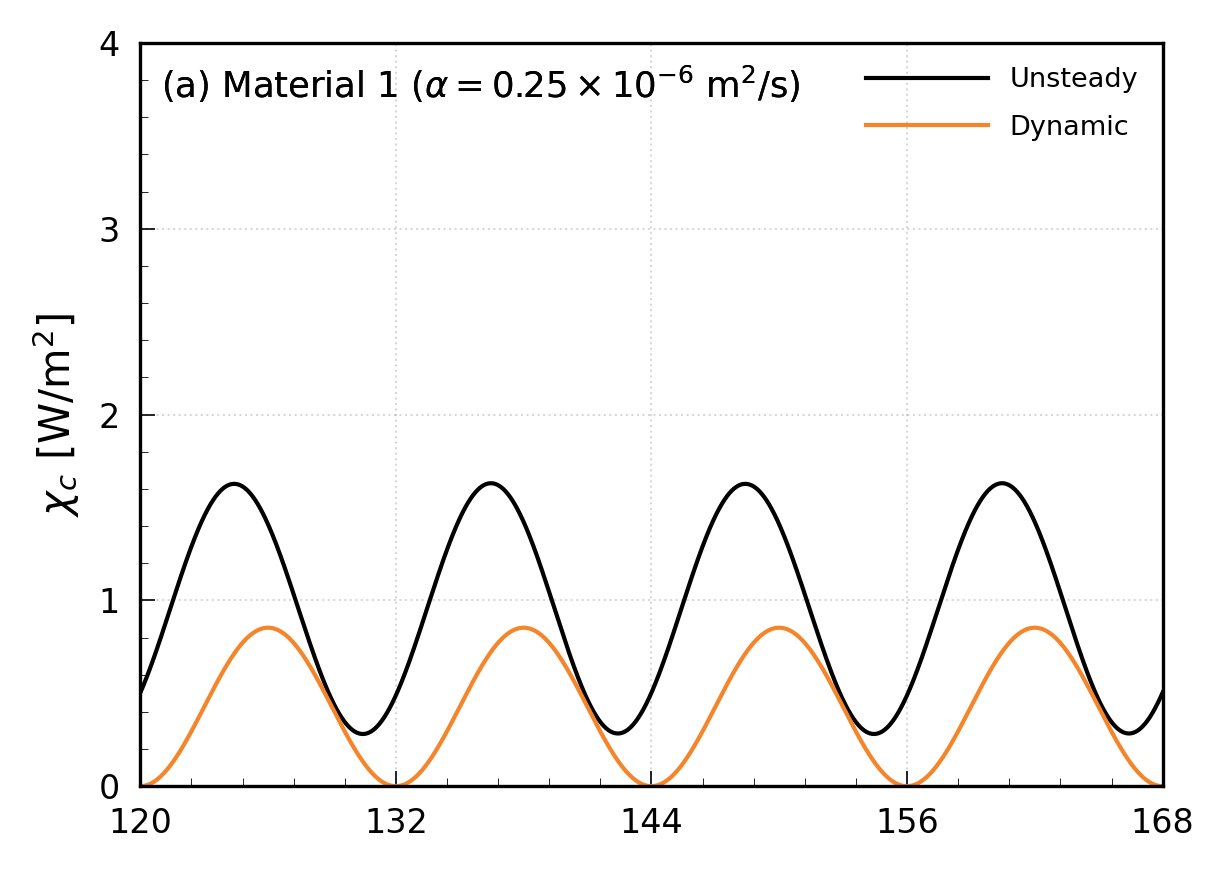

In [59]:
plot_Exergy_consumtion_rate_comp() 

### 결과 비교

In [61]:
time_count = 0 # 두 해석 방법간 밀려난 타임스탭 카운트 변수 
ST_a_to_b_list = []
UST_a_to_b_list = []
a = int(120*time_step_list_num/duration)  # 최댓값 및 밀려난 정도를 찾을 구간 a,b
b = int(132*time_step_list_num/duration)

# Sum Data Farme
M1_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[0]))
M2_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[1]))
M3_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[2]))
M4_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[3]))
EX_C_UST_SUM_DF_LIST = [M1_EX_C_UST_SUM_DF,
                        M2_EX_C_UST_SUM_DF,
                        M3_EX_C_UST_SUM_DF,
                        M4_EX_C_UST_SUM_DF] 

M1_EX_C_ST_DF = pd.DataFrame(EX_C_ST[0])
M2_EX_C_ST_DF = pd.DataFrame(EX_C_ST[1])
M3_EX_C_ST_DF = pd.DataFrame(EX_C_ST[2])
M4_EX_C_ST_DF = pd.DataFrame(EX_C_ST[3])
EX_C_ST_SUM_DF_LIST = [M1_EX_C_ST_DF,
                       M2_EX_C_ST_DF,
                       M3_EX_C_ST_DF,
                       M4_EX_C_ST_DF]
A = True
for midx in range(4):
    for tidx in range(a,b):
        UST_a_to_b_list.append(EX_C_UST_SUM_DF_LIST[midx].iat[tidx,0])
        ST_a_to_b_list.append(EX_C_ST_SUM_DF_LIST[midx].iat[tidx,0])

        if A == True:
            if EX_C_UST_SUM_DF_LIST[midx].iat[tidx+1,0] > EX_C_UST_SUM_DF_LIST[midx].iat[tidx,0]:
                time_count += 1
            elif EX_C_UST_SUM_DF_LIST[midx].iat[tidx+1,0] < EX_C_UST_SUM_DF_LIST[midx].iat[tidx,0]:
                A = False
        else:
            pass
            
    time_difference = (6*time_step_list_num*t)/duration/3600 - time_count*20/3600

    print(f"Ratio of peak value in material {midx+1} {' '*3} {round(np.max(UST_a_to_b_list)/np.max(ST_a_to_b_list),2)}")
    print(f"time differnece {round(((1080-time_count)*20/3600), 2)} [h]\n")
    ST_a_to_b_list = []
    UST_a_to_b_list = []    
    time_count = 0
    A = True 

Ratio of peak value in material 1     1.91
time differnece 1.59 [h]

Ratio of peak value in material 2     1.19
time differnece 1.06 [h]

Ratio of peak value in material 3     1.04
time differnece 0.43 [h]

Ratio of peak value in material 4     1.01
time differnece 0.19 [h]



### 결과 비교 120~132

In [13]:
def show_difference_EX_C_rate():
    time_count = 0 # 두 해석 방법간 밀려난 타임스탭 카운트 변수 
    ST_a_to_b_list = []
    UST_a_to_b_list = []
    a = int(120*time_step_list_num/duration)  # 최댓값 및 밀려난 정도를 찾을 구간 a,b
    b = int(132*time_step_list_num/duration)

    # Sum Data Farme
    M1_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[0]))
    M2_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[1]))
    M3_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[2]))
    M4_EX_C_UST_SUM_DF = pd.DataFrame(Sum_node(EX_C_UST[3]))
    EX_C_UST_SUM_DF_LIST = [M1_EX_C_UST_SUM_DF,
                            M2_EX_C_UST_SUM_DF,
                            M3_EX_C_UST_SUM_DF,
                            M4_EX_C_UST_SUM_DF] 

    M1_EX_C_ST_DF = pd.DataFrame(EX_C_ST[0])
    M2_EX_C_ST_DF = pd.DataFrame(EX_C_ST[1])
    M3_EX_C_ST_DF = pd.DataFrame(EX_C_ST[2])
    M4_EX_C_ST_DF = pd.DataFrame(EX_C_ST[3])
    EX_C_ST_SUM_DF_LIST = [M1_EX_C_ST_DF,
                        M2_EX_C_ST_DF,
                        M3_EX_C_ST_DF,
                        M4_EX_C_ST_DF]
    A = True
    for midx in range(4):
        for tidx in range(a,b):
            UST_a_to_b_list.append(EX_C_UST_SUM_DF_LIST[midx].iat[tidx,0])
            ST_a_to_b_list.append(EX_C_ST_SUM_DF_LIST[midx].iat[tidx,0])

            if A == True:
                if EX_C_UST_SUM_DF_LIST[midx].iat[tidx+1,0] > EX_C_UST_SUM_DF_LIST[midx].iat[tidx,0]:
                    time_count += 1
                elif EX_C_UST_SUM_DF_LIST[midx].iat[tidx+1,0] < EX_C_UST_SUM_DF_LIST[midx].iat[tidx,0]:
                    A = False
            else:
                pass
                
        time_difference = (6*time_step_list_num*t)/duration/3600 - time_count*20/3600

        print(f"Ratio of peak value in material {midx+1} {' '*3} {round(np.max(UST_a_to_b_list)/np.max(ST_a_to_b_list),2)}")
        print(f"time differnece {round(((1080-time_count)*20/3600), 2)} [h]\n")
        ST_a_to_b_list = []
        UST_a_to_b_list = []    
        time_count = 0
        A = True 
show_difference_EX_C_rate()

Ratio of peak value in material 1     1.91
time differnece 1.59 [h]

Ratio of peak value in material 2     1.19
time differnece 1.06 [h]

Ratio of peak value in material 3     1.04
time differnece 0.43 [h]

Ratio of peak value in material 4     1.01
time differnece 0.19 [h]



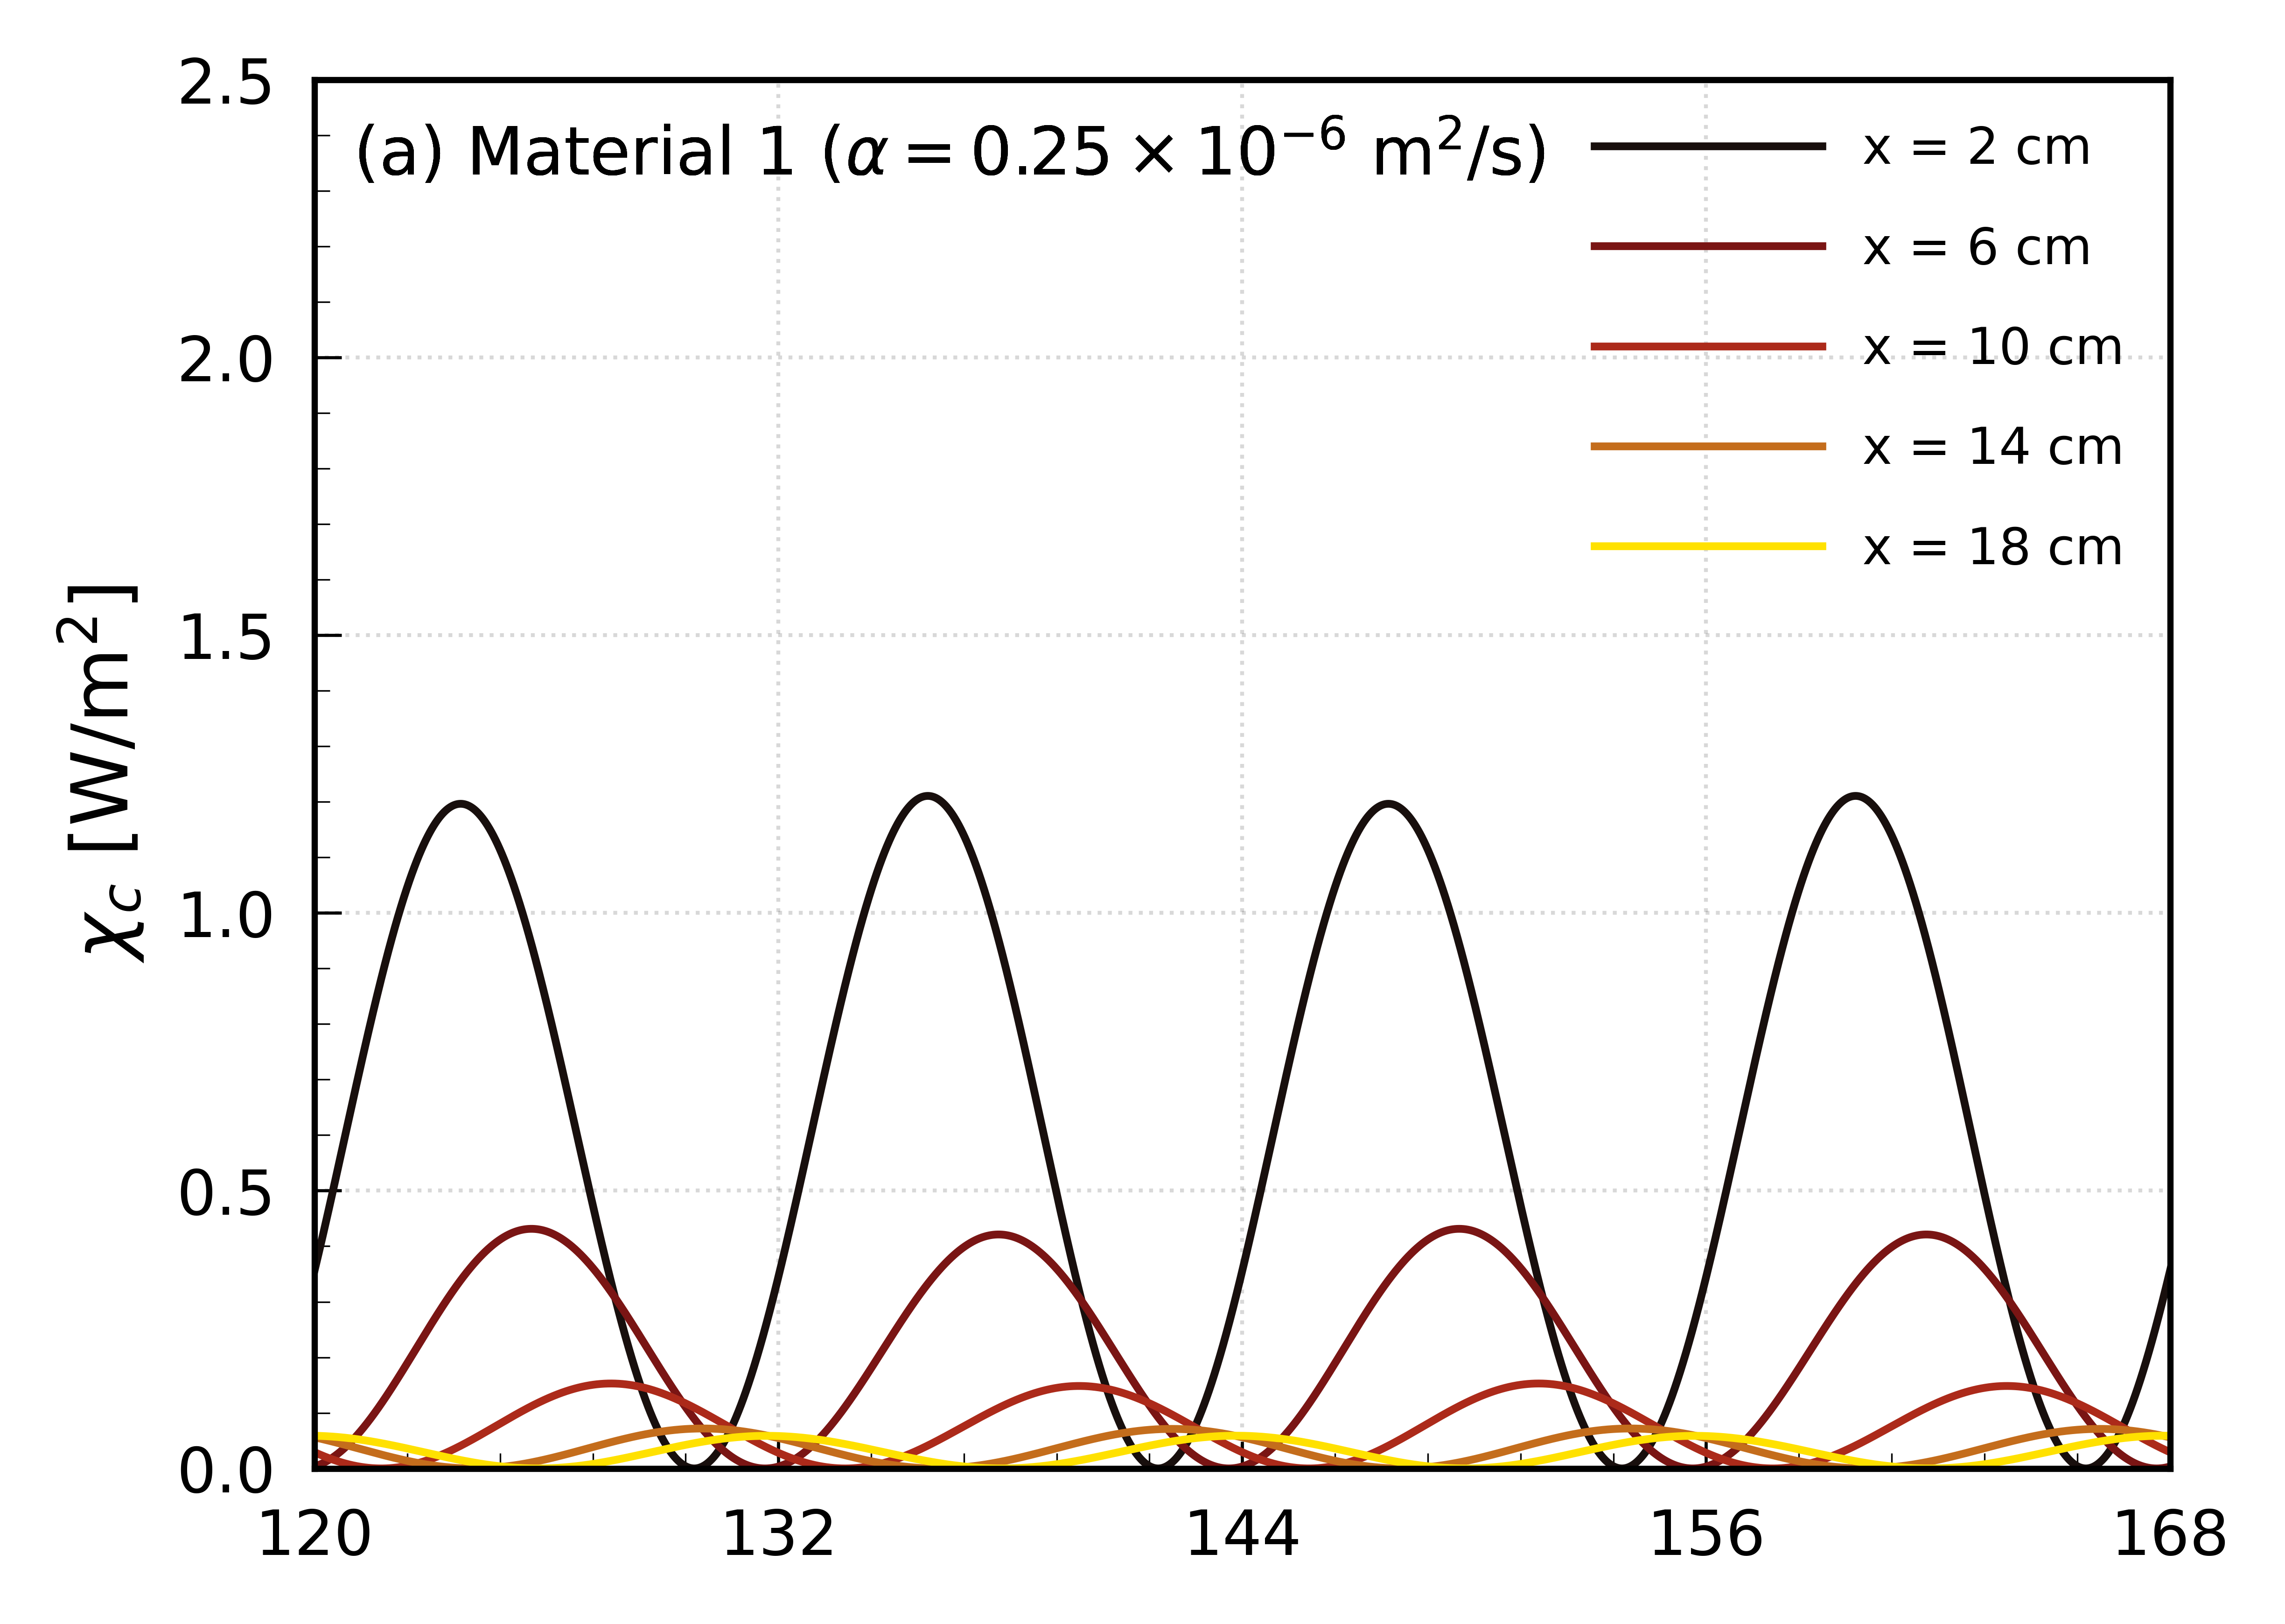

In [51]:
plot_Exergy_consumption_rate_each_cell()

### Exergy consumption

In [44]:
# [J/m2]
INT_ST = []
INT_UST = []
for midx in range(len(MATERIAL)):
    INT_UST.append(Intergrate(**
    {'VAL_WANT_TO_INT' : Sum_node(EX_C_UST[midx]),
    'timestep' : t,
    'a' : 120,
    'b' : 168
    }))
    INT_ST.append(Intergrate(**
    {'VAL_WANT_TO_INT' : EX_C_ST[midx],
    'timestep' : t,
    'a' : 120,
    'b' : 168
    }))

DF_INT = pd.DataFrame({'Unsteady' : INT_UST,'Dynamic' : INT_ST})
DF_INT.index = ['Material 1','Material 2','Material 3','Material 4']
DF_INT =J2KJ(DF_INT)
DF_INT

,Unsteady,Dynamic
Material 1,165.093749,73.682415
Material 2,225.999405,147.364830
Material 3,282.154348,221.047245
Material 4,343.460167,294.729661


C:\Users\Habin Jo\AppData\Local\Temp\ipykernel_17204\554024616.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_ylim(0,0.4,0.1)


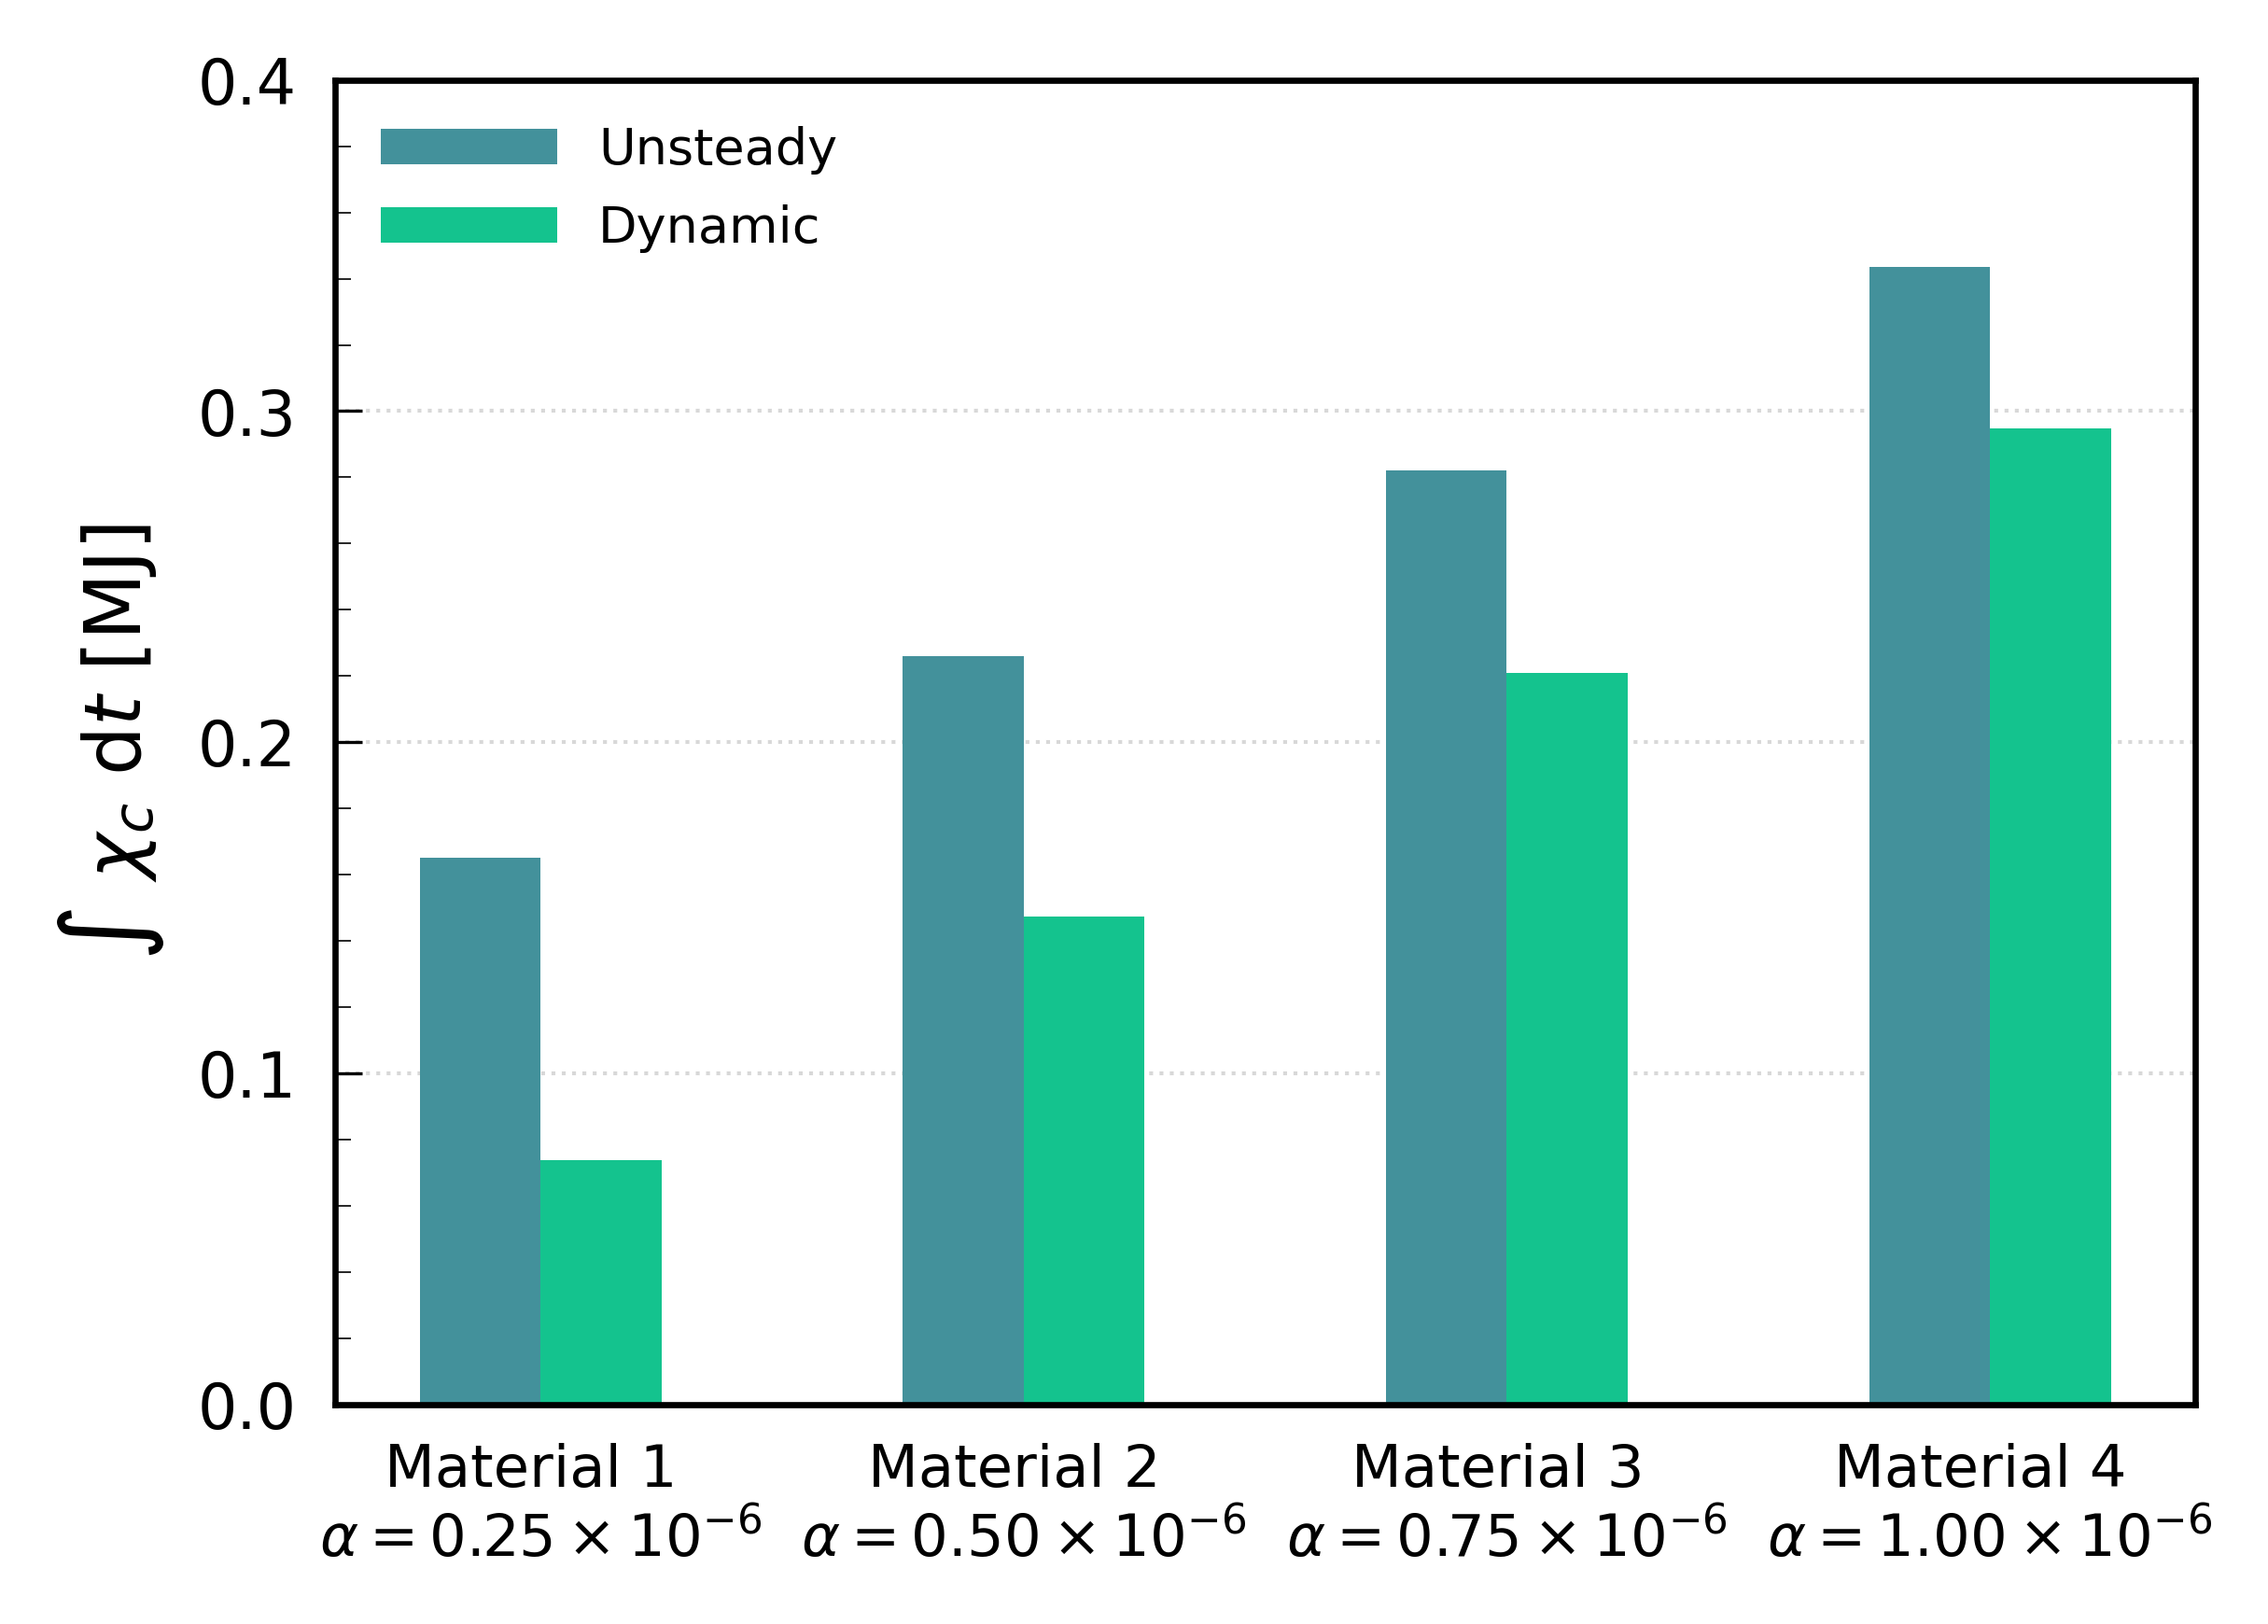

In [45]:
fig, ax = plt.subplots(figsize=(cm2in(10),cm2in(7)), facecolor = 'w', dpi =600)
bar_width = 0.25

# Data가 네 개씩 있으므로 4로 설정
index = np.arange(4)

# tick 위치 배정 및 틱제거 
ax.set_xticks(np.arange(0.125, 4, 1), minor = False,)
ax.set_xticklabels(['Material 1 \n' r'$\mathit{\alpha}=0.25\times 10^{-6}$',
                    'Material 2 \n' r'$\mathit{\alpha}=0.50\times 10^{-6}$',
                    'Material 3 \n' r'$\mathit{\alpha}=0.75\times 10^{-6}$',
                    'Material 4 \n' r'$\mathit{\alpha}=1.00\times 10^{-6}$'])
y_min = 0 
y_max = 0.4
y_int = 0.1 
ax.set_yticks(np.arange(y_min,y_max+y_int,y_int))
ax.tick_params(bottom = False)

# 각 축 숫자 사이즈 
ax.tick_params(axis= 'x', direction='in', labelsize=7.5, which='major', width=width_major, pad = pad_val)
ax.tick_params(axis= 'y', direction='in', labelsize=Axis_FS, which='major', width=width_major, pad = pad_val) # -- 주눈금 
ax.tick_params(direction='in', labelsize=Axis_FS, which='minor', width=width_minor) # -- 보조눈금 

# y label
ax.set_ylabel(r'$\int~\mathit{\chi_{c}}~\mathrm{d} \mathit{t} ~\mathrm{[MJ]}$', fontsize=FS_ylabel)

# y 축 범위
ax.set_ylim(0,0.4,0.1)

# 
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(1)) 
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 

# Decimal
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))

# 
ax.grid(True, axis='x', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0 )
ax.grid(True, axis='y', linestyle = ':', linewidth=LW[2], color='0.25', alpha = 0.2 ); 

# grid to back 
ax.set_axisbelow(True)

# x축, y축 이름 및 범례 설정
ax = plt.bar(index, DF_INT['Unsteady']/1000, bar_width, alpha=1, color='#43919B', label='Unsteady')
ax = plt.bar(index + bar_width, DF_INT['Dynamic']/1000, bar_width, alpha=1, color='#14C38E', label='Dynamic')

plt.legend(loc='upper left', bbox_to_anchor=None, frameon=False, 
            edgecolor='None', facecolor='None',
            fontsize= 6.5, fancybox=False, 
            columnspacing= 1.1, labelspacing=0.6,
            handlelength=3.5,
            )
fig.tight_layout(pad=0.2, h_pad=1)

# 저장코드
save_dir='../fig/'
# File name.
save_stem = 'EX_C_bar_plot'
ext = '.svg'
#  bbox_inches = 'tight'
plt.savefig(f'{save_dir}{save_stem}{ext}', transparent = True, dpi=300, bbox_inches = 'tight')

In [17]:
print('-'*1, 'Exergy consumption ratio(Unsteady/Dynamic)', '-'*1)
for midx in range(4):
    print(f'\n{" "*5}Material {midx+1} {" "*10} {cut2(DF_INT.iat[midx,0]/DF_INT.iat[midx,1])}') 

- Exergy consumption ratio(Unsteady/Dynamic) -

     Material 1            2.24

     Material 2            1.53

     Material 3            1.28

     Material 4            1.17
